https://github.com/h2oai/h2o-play/blob/9f94a3ab95deb3d32f728d36006653eb617849f9/webapp/puddle-config.yml#L21

In [111]:
import os
#import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
#os.listdir('speed_test/result')

In [21]:
result_path = 'speed_test/result'
all_files =  os.listdir(result_path)

result_files = []     # json fileのみ取得
for f in all_files:
    if os.path.splitext(f)[1] == '.json':
        result_files.append(f)

print('All files: {}, json files: {}'.format(len(all_files), len(result_files)))

All files: 25, json files: 24


In [46]:
result_files[:4]

['speedtest_2022年03月08日22時09分31秒.json',
 'speedtest_2022年03月09日05時48分59秒.json',
 'speedtest_2022年03月08日21時52分18秒.json',
 'speedtest_2022年03月09日01時31分24秒.json']

In [55]:
#jf =  'speedtest_2022年03月08日22時18分21秒.json'
#pd.read_json(os.path.join(result_path, jf), orient='index').transpose()

In [60]:
for i, jf in enumerate(result_files):
    if i == 0:
        df = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
    else:
        df_tmp = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
        df = pd.concat([df, df_tmp])

df = df.reset_index()
df.shape

(24, 10)

In [62]:
df.head()

,index,Meta_Data,Data_Name,Try,Datasize_mb,N_Observation,N_features,Duration_min,Experiment_Size_mb,Acc_Time_Interpret
0,0,experiment_meta_data/Experiments_Params_0308_G...,BostonHousing.csv,3,0.055092,506,13,8.674953,1061.235523,"[7, 2, 8]"
1,0,experiment_meta_data/Experiments_Params_0308_G...,loan_level_1M.csv,3,156.649689,1000000,24,73.813374,1355.719215,"[7, 5, 5]"
2,0,experiment_meta_data/Experiments_Params_0308_G...,BostonHousing.csv,3,0.055092,506,13,8.302996,1062.099873,"[7, 2, 8]"
3,0,experiment_meta_data/Experiments_Params_0308_G...,loan_level_1M.csv,3,156.649689,1000000,24,125.944246,1814.184278,"[7, 5, 5]"
4,0,experiment_meta_data/Experiments_Params_0308_c...,loan_level_500k.csv,3,78.349548,500137,24,69.595436,1448.075129,"[7, 5, 5]"


In [123]:
df['sort_index'] = df['Data_Name'].map({'BostonHousing.csv':1,
                                        'UCI_Credit_Card3.csv':2,
                                        'loan_level_500k.csv':3,
                                        'loan_level_1M.csv':4})

df = df.sort_values('sort_index')

In [124]:
#df['Meta_Data'].unique()

In [125]:
#data_list = df['Data_Name'].unique().tolist()
#data_list

In [126]:
# 利用データに関して
df[['Data_Name','Datasize_mb','N_Observation','N_features']].drop_duplicates()

,Data_Name,Datasize_mb,N_Observation,N_features
0,BostonHousing.csv,0.055092,506,13
6,UCI_Credit_Card3.csv,3.327423,30000,22
4,loan_level_500k.csv,78.349548,500137,24
19,loan_level_1M.csv,156.649689,1000000,24


In [127]:
df_cpu = df[df['Meta_Data']=='experiment_meta_data/Experiments_Params_0308_cpu.csv']   # CPUマシン結果
df_cpu = df_cpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_cpu['Duration_min'] = df_cpu['Duration_min'].astype(np.float64)
df_cpu['Experiment_Size_mb'] = df_cpu['Experiment_Size_mb'].astype(np.float64)
#df_cpu = df_cpu.sort_values('Data_Name')

df_gpu = df[df['Meta_Data']=='experiment_meta_data/Experiments_Params_0308_Gpu.csv']  # GPUマシン結果
df_gpu = df_gpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_gpu['Duration_min'] = df_gpu['Duration_min'].astype(np.float64)
df_gpu['Experiment_Size_mb'] = df_gpu['Experiment_Size_mb'].astype(np.float64)
#df_gpu = df_gpu.sort_values('Data_Name')

df_cpu.shape, df_gpu.shape

((12, 3), (12, 3))

In [137]:
#df_cpu

In [133]:
df_cpu.groupby('Data_Name').mean().reindex(index=['BostonHousing.csv','UCI_Credit_Card3.csv','loan_level_500k.csv','loan_level_1M.csv'])

,Duration_min,Experiment_Size_mb
Data_Name,,
BostonHousing.csv,4.931919,1065.058941
UCI_Credit_Card3.csv,4.316354,1070.865732
loan_level_500k.csv,55.182633,1300.115312
loan_level_1M.csv,99.216396,1555.837948


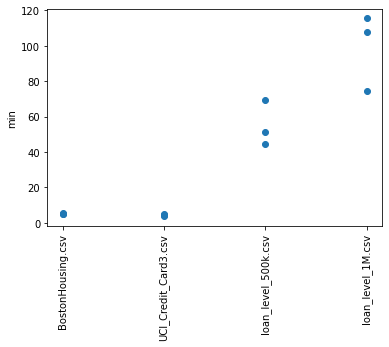

In [141]:
plt.scatter(df_cpu['Data_Name'], df_cpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()

In [136]:
#df_gpu

In [134]:
df_gpu.groupby('Data_Name').mean().reindex(index=['BostonHousing.csv','UCI_Credit_Card3.csv','loan_level_500k.csv','loan_level_1M.csv'])

,Duration_min,Experiment_Size_mb
Data_Name,,
BostonHousing.csv,8.520702,1062.301277
UCI_Credit_Card3.csv,5.535453,1078.959217
loan_level_500k.csv,58.416344,1257.104580
loan_level_1M.csv,110.304617,1591.140978


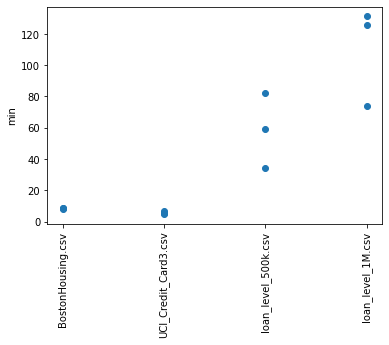

In [142]:
plt.scatter(df_gpu['Data_Name'], df_gpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()